In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [3]:
df=pd.read_csv("data/raw_data.csv")

In [4]:
df.head()

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,City,Temp_Range,Heat_Index,Severity_Score,Condition_Code,Month,Season,Day_of_Week,Is_Weekend,Health_Risk_Score
0,2024-09-07,1.725692e+09,106.1,91.0,98.5,104.0,88.1,95.9,51.5,21.0,...,Phoenix,15.1,95.918703,4.4300,NaN,9.0,Fall,Saturday,True,10.522170
1,2024-09-08,1.725779e+09,103.9,87.0,95.4,100.5,84.7,92.3,48.7,21.5,...,Phoenix,16.9,92.281316,3.8800,0.0,9.0,Fall,Sunday,True,10.062332
2,2024-09-09,1.725865e+09,105.0,83.9,94.7,99.9,81.6,90.6,41.7,16.9,...,Phoenix,21.1,90.599165,3.6300,0.0,9.0,Fall,Monday,False,9.673387
3,2024-09-10,1.725952e+09,106.1,81.2,93.9,100.6,79.5,89.8,39.1,15.7,...,Phoenix,24.9,89.638811,2.8512,0.0,9.0,Fall,Tuesday,False,9.411519
4,2024-09-11,1.726038e+09,106.1,82.1,94.0,101.0,80.0,90.0,40.1,15.9,...,Phoenix,24.0,89.760414,3.3908,0.0,9.0,Fall,Wednesday,False,9.515179


In [5]:
df.isnull().sum()

datetime               0
datetimeEpoch          0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
preciptype           622
snow                   0
snowdepth             71
windgust               0
windspeed              0
winddir                0
pressure               0
cloudcover             0
visibility             0
solarradiation         0
solarenergy            0
uvindex                0
severerisk             0
sunrise                0
sunriseEpoch           0
sunset                 0
sunsetEpoch            0
moonphase              0
conditions             0
description            0
icon                   0
stations             933
source                 0
City                   0
Temp_Range             0
Heat_Index             0
Severity_Score         0


In [6]:
df.dtypes

datetime              object
datetimeEpoch        float64
tempmax              float64
tempmin              float64
temp                 float64
feelslikemax         float64
feelslikemin         float64
feelslike            float64
dew                  float64
humidity             float64
precip               float64
precipprob           float64
precipcover          float64
preciptype            object
snow                 float64
snowdepth            float64
windgust             float64
windspeed            float64
winddir              float64
pressure             float64
cloudcover           float64
visibility           float64
solarradiation       float64
solarenergy          float64
uvindex              float64
severerisk           float64
sunrise               object
sunriseEpoch         float64
sunset                object
sunsetEpoch          float64
moonphase            float64
conditions            object
description           object
icon                  object
stations      

In [7]:
df.nunique()

datetime               15
datetimeEpoch         895
tempmax               951
tempmin               948
temp                  970
feelslikemax          962
feelslikemin          951
feelslike             971
dew                   972
humidity              978
precip                885
precipprob            890
precipcover           857
preciptype              1
snow                    1
snowdepth               1
windgust              914
windspeed             891
winddir               996
pressure              952
cloudcover            982
visibility            868
solarradiation        991
solarenergy           932
uvindex               860
severerisk            854
sunrise               148
sunriseEpoch         1000
sunset                145
sunsetEpoch          1000
moonphase             870
conditions              4
description            12
icon                    4
stations               10
source                  2
City                   10
Temp_Range            963
Heat_Index  

In [8]:
df.drop(columns={"datetimeEpoch","preciptype","sunrise","sunriseEpoch","sunset","sunsetEpoch","Condition_Code","Month",
                "Season","stations","snow","snowdepth","description","icon","source"},axis=1,inplace=True)

In [9]:
df.nunique()

datetime               15
tempmax               951
tempmin               948
temp                  970
feelslikemax          962
feelslikemin          951
feelslike             971
dew                   972
humidity              978
precip                885
precipprob            890
precipcover           857
windgust              914
windspeed             891
winddir               996
pressure              952
cloudcover            982
visibility            868
solarradiation        991
solarenergy           932
uvindex               860
severerisk            854
moonphase             870
conditions              4
City                   10
Temp_Range            963
Heat_Index           1000
Severity_Score        968
Day_of_Week             7
Is_Weekend              2
Health_Risk_Score    1000
dtype: int64

In [10]:
df.dtypes

datetime              object
tempmax              float64
tempmin              float64
temp                 float64
feelslikemax         float64
feelslikemin         float64
feelslike            float64
dew                  float64
humidity             float64
precip               float64
precipprob           float64
precipcover          float64
windgust             float64
windspeed            float64
winddir              float64
pressure             float64
cloudcover           float64
visibility           float64
solarradiation       float64
solarenergy          float64
uvindex              float64
severerisk           float64
moonphase            float64
conditions            object
City                  object
Temp_Range           float64
Heat_Index           float64
Severity_Score       float64
Day_of_Week           object
Is_Weekend              bool
Health_Risk_Score    float64
dtype: object

In [11]:
arr=df["conditions"].unique()
map_list={arr[0]:0,
          arr[1]:1,
          arr[2]:2,
          arr[3]:3}
df["conditions"]=df["conditions"].map(map_list)

In [12]:
df["datetime"]=pd.to_datetime(df["datetime"])

In [13]:
df["City"].unique()

array(['Phoenix', 'San Jose', 'San Antonio', 'Los Angeles', 'San Diego',
       'New York City', 'Chicago', 'Philadelphia', 'Dallas', 'Houston'],
      dtype=object)

In [14]:
arr=df["City"].unique()
map_list={arr[0]:0,
          arr[1]:1,
          arr[2]:2,
          arr[4]:4,
          arr[5]:5,
          arr[6]:6,
          arr[7]:7,
          arr[8]:8,
          arr[9]:9
         }
df["City"]=df["City"].map(map_list)

In [15]:
arr=df["Day_of_Week"].unique()
map_list={arr[0]:0,
          arr[1]:1,
          arr[2]:2,
          arr[4]:4,
          arr[5]:5,
          arr[6]:6}
df["Day_of_Week"]=df["Day_of_Week"].map(map_list)

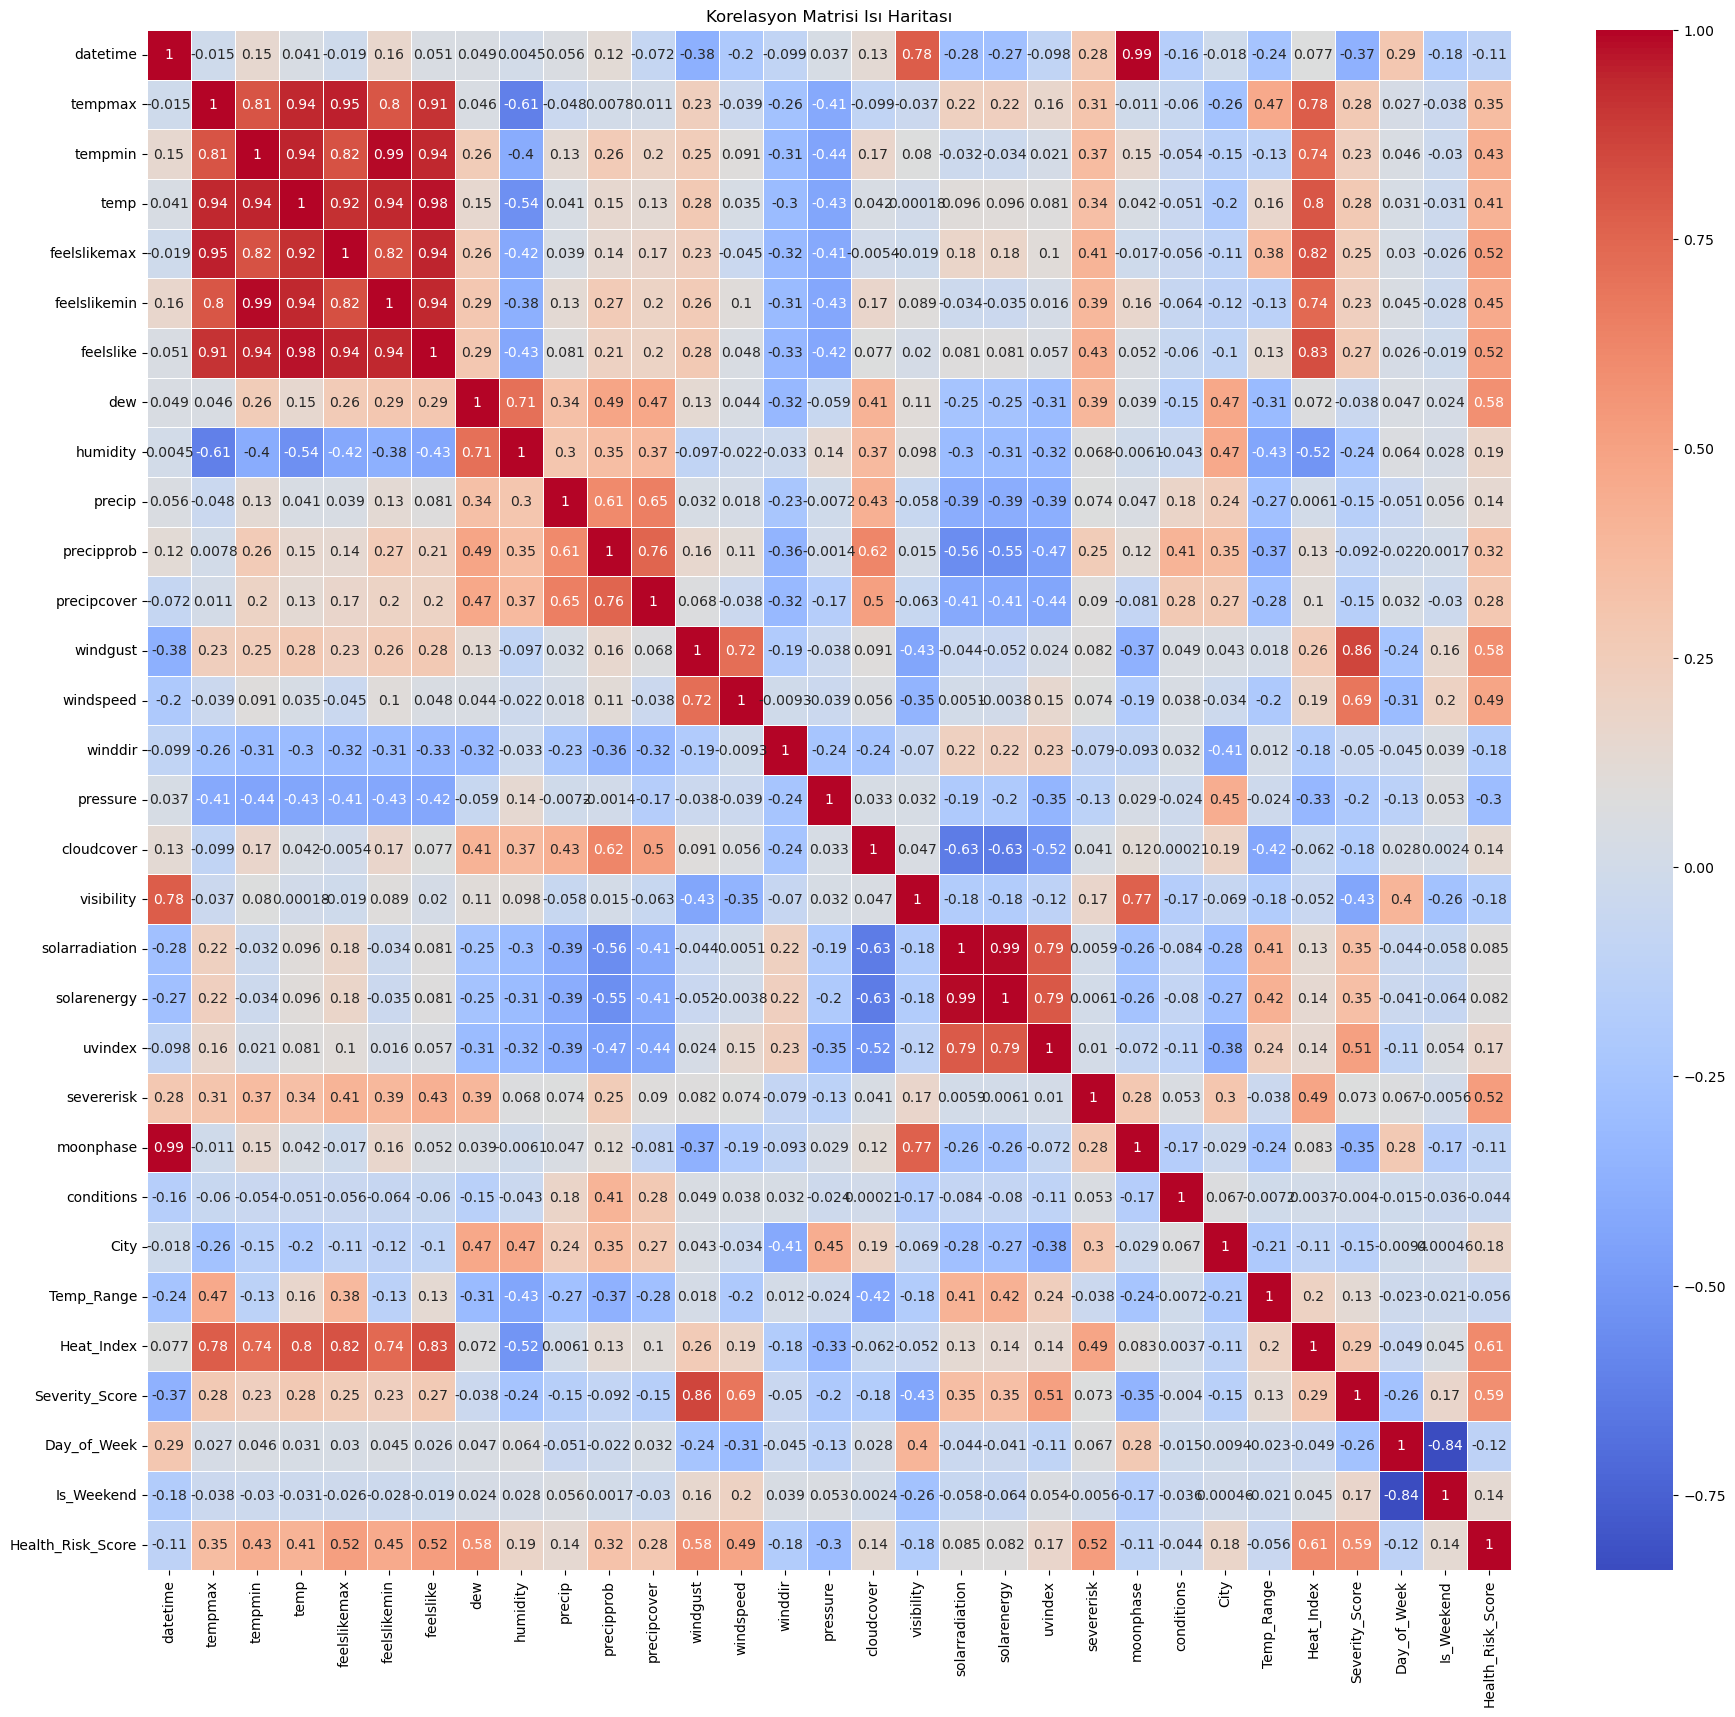

In [16]:
corr_matrix=df.corr()
plt.figure(figsize=(22,20))
sbn.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasyon Matrisi Isı Haritası')
plt.savefig("korelasyon_matrisi_isi_haritasi.png")
plt.show()

In [17]:
corr_max_affected=df.corr()["Health_Risk_Score"].abs().sort_values(ascending=False).nlargest(10)

In [18]:
corr_index=corr_max_affected.index

In [19]:
corr_index

Index(['Health_Risk_Score', 'Heat_Index', 'Severity_Score', 'windgust', 'dew',
       'severerisk', 'feelslike', 'feelslikemax', 'windspeed', 'feelslikemin'],
      dtype='object')

In [20]:
final_df=df[corr_index]

In [21]:
final_df.head()

,Health_Risk_Score,Heat_Index,Severity_Score,windgust,dew,severerisk,feelslike,feelslikemax,windspeed,feelslikemin
0,10.522170,95.918703,4.4300,26.3,51.5,10.0,95.9,104.0,13.7,88.1
1,10.062332,92.281316,3.8800,20.8,48.7,10.0,92.3,100.5,12.8,84.7
2,9.673387,90.599165,3.6300,18.3,41.7,10.0,90.6,99.9,10.3,81.6
3,9.411519,89.638811,2.8512,10.5,39.1,10.0,89.8,100.6,5.4,79.5
4,9.515179,89.760414,3.3908,15.9,40.1,10.0,90.0,101.0,8.1,80.0


In [22]:
final_df.shape

(1000, 10)

In [23]:
final_df.describe()

,Health_Risk_Score,Heat_Index,Severity_Score,windgust,dew,severerisk,feelslike,feelslikemax,windspeed,feelslikemin
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,9.729103,80.195613,3.057743,15.229714,57.267120,12.923695,76.323286,85.195384,9.871120,68.547548
std,0.679728,6.053805,0.624024,5.350923,9.161517,8.838858,8.621361,9.496951,2.753853,8.365809
min,8.492431,65.511677,1.578048,3.495792,26.261814,7.507579,57.748822,62.206413,4.885928,48.834041
25%,9.195244,76.287207,2.583375,11.817878,51.229378,9.705341,68.930104,78.485332,8.261997,62.734961
50%,9.546156,78.562345,3.026242,14.938354,58.598490,10.080919,75.544961,84.284077,9.587932,67.844544
75%,10.242523,85.318985,3.507127,18.592236,62.738294,10.860683,84.309449,93.757026,10.852199,75.591093
max,11.485725,96.684162,5.158112,33.516843,76.648668,61.727919,98.193984,105.060170,19.023118,89.369854


In [24]:
final_df.to_csv("data/final_df.csv",index=False)

In [25]:
final_df.tail()

,Health_Risk_Score,Heat_Index,Severity_Score,windgust,dew,severerisk,feelslike,feelslikemax,windspeed,feelslikemin
995,8.750142,71.837558,1.957318,13.864632,59.936776,10.563084,67.003338,77.673823,7.435891,63.510920
996,9.118198,72.463491,2.537413,6.233441,59.010257,9.838767,65.992526,68.956722,8.930235,64.805635
997,9.880093,67.560060,3.595470,17.387860,62.024442,10.502440,67.313322,68.158536,11.082903,63.662942
998,9.561602,67.930437,3.498942,15.748270,63.169608,9.847929,68.094309,76.426959,8.028200,60.901526
999,10.978044,86.802712,3.040020,16.615351,73.393045,30.395643,84.987113,94.180423,10.479637,78.071851
